# Usage (details: policy measures)
Here, we will analyse the relationship of policy measures and parameter values of SIR-derived ODE models. Policy measures are tracked by [Oxford Covid-19 Government Response Tracker (OxCGRT)](https://github.com/OxCGRT/covid-policy-tracker).

## Preparation

In [1]:
# Standard users
# !pip install covsirphy
# Developers (Note: this notebook is in example directory)
import os
os.chdir("../")

In [2]:
from pprint import pprint

In [3]:
import covsirphy as cs
cs.__version__

'2.13.0-alpha.fix.417'

In [4]:
# Standard users and developers
data_loader = cs.DataLoader("input")
# The number of cases (JHU style)
jhu_data = data_loader.jhu(verbose=False)
# Population in each country
population_data = data_loader.population(verbose=False)
# Government Response Tracker (OxCGRT)
oxcgrt_data = data_loader.oxcgrt(verbose=False)
# Description/citation
print(oxcgrt_data.citation)

(Secondary source) Guidotti, E., Ardia, D., (2020), "COVID-19 Data Hub", Journal of Open Source Software 5(51):2376, doi: 10.21105/joss.02376.


## Class for policy measure analysis
We will `PolicyMeasures` class to find relationship of policy measures and parameter values of SIR-derived ODE models.

In [5]:
# Create analyser with tau value 360 [min] (can be changed)
analyser = cs.PolicyMeasures(jhu_data, population_data, oxcgrt_data, tau=360)
# The number of registerd countries
len(analyser.countries)

/home/runner/.local/share/virtualenvs/covid19-sir-kT3BL-HO/lib/python3.8/site-packages/scipy/interpolate/fitpack2.py:253: UserWarning: 
The maximal number of iterations maxit (set to 20 by the program)
allowed for finding a smoothing spline with fp=s has been reached: s
too small.
There is an approximation returned but the corresponding weighted sum
of squared residuals does not satisfy the condition abs(fp-s)/s < tol.
  warnings.warn(message)


196

In [6]:
# We can get Scenario instance for detailed scenario analysis
type(analyser.scenario("Japan"))

covsirphy.analysis.scenario.Scenario

## Set phases with S-R trend analysis
We will perform S-R trend analysis to set phases in all countries. Countries which do not have **16th phases** will be un-registered for the next analysis. This number will be adjusted for your analysis.

In [7]:
# Show the number of phases of all countries
analyser.trend()
pprint(analyser.phase_len(), compact=True)

{2: ['Solomon Islands', 'Holy See'],
 3: ['Saint Kitts and Nevis', 'Timor-Leste', 'Laos', 'Tanzania'],
 4: ['Brunei', 'Dominica', 'Saint Lucia'],
 5: ['Grenada', 'Fiji', 'Equatorial Guinea'],
 6: ['Saint Vincent and the Grenadines', 'Mauritius', 'Antigua and Barbuda'],
 7: ['Cambodia', 'Gambia'],
 8: ['Trinidad and Tobago', 'Seychelles', 'Madagascar',
     'Northern Mariana Islands', 'Liechtenstein', 'Vietnam', 'Bahamas',
     'Monaco', 'Kyrgyzstan'],
 9: ['Virgin Islands, U.S.', 'Bolivia', 'Kazakhstan', 'Australia', 'Uzbekistan',
     'Zambia', 'Suriname', 'Burundi', 'Djibouti', 'Lesotho', 'Swaziland',
     'Ghana', 'Zimbabwe', 'Oman', 'South Africa', 'Sao Tome and Principe',
     'Republic of the Congo', 'Bermuda', 'Malawi', 'Barbados'],
 10: ['Philippines', 'Singapore', 'Chile', 'Benin', 'New Zealand', 'Kuwait',
      'Mongolia', 'Guyana', 'Saudi Arabia', 'Papua New Guinea', 'Guatemala',
      'Eritrea', 'Senegal', 'Mozambique', 'Syria', 'Ethiopia', 'Venezuela',
      'Dominican Rep

In [8]:
# Set phases with S-R trend analysis
analyser.trend(min_len=16)
# The number of countries
len(analyser.countries)

9

In [9]:
phase_len_dict = analyser.phase_len()
pprint(phase_len_dict, compact=True)

{16: ['Belgium', 'France', 'Canada', 'Finland', 'Romania', 'Denmark',
      'Netherlands', 'Ukraine'],
 17: ['United Kingdom']}


In [10]:
# Here, only show the countries which have the most phases
countries_show = max(phase_len_dict.items(), key=lambda x: x[0])[1]
# Show summary
analyser.summary(countries=countries_show)

Type      Start        End  Population
Country        Phase                                        
United Kingdom 0th    Past  18Feb2020  06Apr2020    66460344
               1st    Past  07Apr2020  23Apr2020    66460344
               2nd    Past  24Apr2020  11May2020    66460344
               3rd    Past  12May2020  11Jun2020    66460344
               4th    Past  12Jun2020  17Aug2020    66460344
               5th    Past  18Aug2020  17Sep2020    66460344
               6th    Past  18Sep2020  02Oct2020    66460344
               7th    Past  03Oct2020  11Oct2020    66460344
               8th    Past  12Oct2020  19Oct2020    66460344
               9th    Past  20Oct2020  25Oct2020    66460344
               10th   Past  26Oct2020  05Nov2020    66460344
               11th   Past  06Nov2020  11Nov2020    66460344
               12th   Past  12Nov2020  17Nov2020    66460344
               13th   Past  18Nov2020  24Nov2020    66460344
               14th   Past  25Nov2020  01Dec2020    66460344
               15th   Past  02Dec2020  08Dec2020    66460344
               16th   Past  09Dec2020  15Dec2020    66460344

## Parameter estimation
we will estimate the parameter values with SIR-derived ODE models in each country.

In [11]:
# Parameter estimation with SIR-F model
analyser.estimate(cs.SIRF, timeout=10)


<SIR-F model: parameter estimation>
Running optimization with 4 CPUs...


	FIN, 10th phase (03Nov2020 - 11Nov2020): finished  251 trials in 0 min 10 sec

	NLD,  8th phase (06Oct2020 - 15Oct2020): finished  232 trials in 0 min 10 sec

	UKR,  6th phase (01Oct2020 - 11Oct2020): finished  236 trials in 0 min 10 sec

	FIN,  7th phase (05Oct2020 - 13Oct2020): finished  255 trials in 0 min 10 sec

/home/runner/.local/share/virtualenvs/covid19-sir-kT3BL-HO/lib/python3.8/site-packages/scipy/interpolate/fitpack2.py:253: UserWarning: 
The maximal number of iterations maxit (set to 20 by the program)
allowed for finding a smoothing spline with fp=s has been reached: s
too small.
There is an approximation returned but the corresponding weighted sum
of squared residuals does not satisfy the condition abs(fp-s)/s < tol.
  warnings.warn(message)


	NLD,  6th phase (20Sep2020 - 28Sep2020): finished  242 trials in 0 min 10 sec

	ROU,  5th phase (10Sep2020 - 29Sep2020): finished  243 trials in 0 min 10 sec

	FRA,  9th phase (16Oct2020 - 21Oct2020): finished  234 trials in 0 min 10 sec

	ROU,  9th phase (29Oct2020 - 04Nov2020): finished  244 trials in 0 min 10 sec

/home/runner/.local/share/virtualenvs/covid19-sir-kT3BL-HO/lib/python3.8/site-packages/scipy/interpolate/fitpack2.py:253: UserWarning: 
The maximal number of iterations maxit (set to 20 by the program)
allowed for finding a smoothing spline with fp=s has been reached: s
too small.
There is an approximation returned but the corresponding weighted sum
of squared residuals does not satisfy the condition abs(fp-s)/s < tol.
  warnings.warn(message)


	NLD, 13th phase (18Nov2020 - 28Nov2020): finished  236 trials in 0 min 10 sec

	FRA,  4th phase (26Aug2020 - 09Sep2020): finished  248 trials in 0 min 10 sec

	FIN,  9th phase (24Oct2020 - 02Nov2020): finished  252 trials in 0 min 10 sec

	ROU,  2nd phase (08Jul2020 - 30Jul2020): finished  232 trials in 0 min 10 sec

	CAN,  7th phase (29Sep2020 - 11Oct2020): finished  244 trials in 0 min 10 sec

	ROU,  6th phase (30Sep2020 - 11Oct2020): finished  235 trials in 0 min 10 sec

	BEL,  0th phase (13Mar2020 - 30Mar2020): finished  241 trials in 0 min 10 sec

	DNK,  4th phase (10Aug2020 - 08Sep2020): finished  232 trials in 0 min 10 sec

	GBR,  9th phase (20Oct2020 - 25Oct2020): finished  169 trials in 0 min 10 sec

	CAN,  8th phase (12Oct2020 - 24Oct2020): finished  172 trials in 0 min 10 sec

	ROU,  1st phase (02May2020 - 07Jul2020): finished  157 trials in 0 min 10 sec

	BEL,  4th phase (28Jul2020 - 22Aug2020): finished  158 trials in 0 min 10 sec

	DNK,  9th phase (23Oct2020 - 29Oct2020): finished  233 trials in 0 min 10 sec

	DNK, 14th phase (24Nov2020 - 29Nov2020): finished  252 trials in 0 min 10 sec

	BEL,  8th phase (06Oct2020 - 11Oct2020): finished  255 trials in 0 min 10 sec

	CAN,  3rd phase (12May2020 - 02Jun2020): finished  240 trials in 0 min 10 sec

/home/runner/.local/share/virtualenvs/covid19-sir-kT3BL-HO/lib/python3.8/site-packages/scipy/interpolate/fitpack2.py:253: UserWarning: 
The maximal number of iterations maxit (set to 20 by the program)
allowed for finding a smoothing spline with fp=s has been reached: s
too small.
There is an approximation returned but the corresponding weighted sum
of squared residuals does not satisfy the condition abs(fp-s)/s < tol.
  warnings.warn(message)


/home/runner/.local/share/virtualenvs/covid19-sir-kT3BL-HO/lib/python3.8/site-packages/scipy/interpolate/fitpack2.py:253: UserWarning: 
The maximal number of iterations maxit (set to 20 by the program)
allowed for finding a smoothing spline with fp=s has been reached: s
too small.
There is an approximation returned but the corresponding weighted sum
of squared residuals does not satisfy the condition abs(fp-s)/s < tol.
  warnings.warn(message)


	FIN, 13th phase (26Nov2020 - 01Dec2020): finished  307 trials in 0 min 10 sec

	GBR, 15th phase (02Dec2020 - 08Dec2020): finished  311 trials in 0 min 10 sec

	FRA,  6th phase (22Sep2020 - 30Sep2020): finished  301 trials in 0 min 10 sec

	FRA, 10th phase (22Oct2020 - 31Oct2020): finished  311 trials in 0 min 10 sec

	DNK, 15th phase (30Nov2020 - 15Dec2020): finished  296 trials in 0 min 10 sec

	ROU, 14th phase (02Dec2020 - 07Dec2020): finished  286 trials in 0 min 10 sec

	NLD,  0th phase (11Mar2020 - 31Mar2020): finished  314 trials in 0 min 10 sec

	BEL,  6th phase (15Sep2020 - 27Sep2020): finished  283 trials in 0 min 10 sec

/home/runner/.local/share/virtualenvs/covid19-sir-kT3BL-HO/lib/python3.8/site-packages/scipy/interpolate/fitpack2.py:253: UserWarning: 
The maximal number of iterations maxit (set to 20 by the program)
allowed for finding a smoothing spline with fp=s has been reached: s
too small.
There is an approximation returned but the corresponding weighted sum
of squared residuals does not satisfy the condition abs(fp-s)/s < tol.
  warnings.warn(message)


	DNK,  3rd phase (13Jun2020 - 09Aug2020): finished  275 trials in 0 min 10 sec

	FIN,  0th phase (16Mar2020 - 04Apr2020): finished  301 trials in 0 min 10 sec

	CAN, 11th phase (13Nov2020 - 19Nov2020): finished  282 trials in 0 min 10 sec

	FRA,  0th phase (07Feb2020 - 30Mar2020): finished  262 trials in 0 min 10 sec

	DNK,  2nd phase (03May2020 - 12Jun2020): finished  268 trials in 0 min 10 sec

	GBR, 13th phase (18Nov2020 - 24Nov2020): finished  284 trials in 0 min 10 sec

	BEL, 11th phase (02Nov2020 - 08Nov2020): finished  279 trials in 0 min 10 sec

	GBR, 10th phase (26Oct2020 - 05Nov2020): finished  273 trials in 0 min 10 sec

/home/runner/.local/share/virtualenvs/covid19-sir-kT3BL-HO/lib/python3.8/site-packages/scipy/interpolate/fitpack2.py:253: UserWarning: 
The maximal number of iterations maxit (set to 20 by the program)
allowed for finding a smoothing spline with fp=s has been reached: s
too small.
There is an approximation returned but the corresponding weighted sum
of squared residuals does not satisfy the condition abs(fp-s)/s < tol.
  warnings.warn(message)


	NLD,  4th phase (09Aug2020 - 05Sep2020): finished  311 trials in 0 min 10 sec

	UKR,  8th phase (22Oct2020 - 29Oct2020): finished  308 trials in 0 min 10 sec

	GBR, 11th phase (06Nov2020 - 11Nov2020): finished  282 trials in 0 min 10 sec

	FRA,  5th phase (10Sep2020 - 21Sep2020): finished  279 trials in 0 min 10 sec

	UKR,  2nd phase (09Jul2020 - 11Aug2020): finished  267 trials in 0 min 10 sec

	NLD,  5th phase (06Sep2020 - 19Sep2020): finished  284 trials in 0 min 10 sec

	FIN,  8th phase (14Oct2020 - 23Oct2020): finished  307 trials in 0 min 10 sec

	NLD,  9th phase (16Oct2020 - 25Oct2020): finished  291 trials in 0 min 10 sec

/home/runner/.local/share/virtualenvs/covid19-sir-kT3BL-HO/lib/python3.8/site-packages/scipy/interpolate/fitpack2.py:253: UserWarning: 
The maximal number of iterations maxit (set to 20 by the program)
allowed for finding a smoothing spline with fp=s has been reached: s
too small.
There is an approximation returned but the corresponding weighted sum
of squared residuals does not satisfy the condition abs(fp-s)/s < tol.
  warnings.warn(message)


	UKR,  5th phase (17Sep2020 - 30Sep2020): finished  285 trials in 0 min 10 sec

	FIN,  2nd phase (20Apr2020 - 04May2020): finished  287 trials in 0 min 10 sec

	UKR,  4th phase (01Sep2020 - 16Sep2020): finished  283 trials in 0 min 10 sec

/home/runner/.local/share/virtualenvs/covid19-sir-kT3BL-HO/lib/python3.8/site-packages/scipy/interpolate/fitpack2.py:253: UserWarning: 
The maximal number of iterations maxit (set to 20 by the program)
allowed for finding a smoothing spline with fp=s has been reached: s
too small.
There is an approximation returned but the corresponding weighted sum
of squared residuals does not satisfy the condition abs(fp-s)/s < tol.
  warnings.warn(message)


	FRA, 13th phase (17Nov2020 - 24Nov2020): finished  284 trials in 0 min 10 sec

	NLD,  1st phase (01Apr2020 - 16Apr2020): finished  285 trials in 0 min 10 sec

	CAN, 13th phase (27Nov2020 - 02Dec2020): finished  293 trials in 0 min 10 sec

	FRA,  3rd phase (28Jul2020 - 25Aug2020): finished  291 trials in 0 min 10 sec

	CAN,  0th phase (02Mar2020 - 08Apr2020): finished  285 trials in 0 min 10 sec

/home/runner/.local/share/virtualenvs/covid19-sir-kT3BL-HO/lib/python3.8/site-packages/scipy/interpolate/fitpack2.py:253: UserWarning: 
The maximal number of iterations maxit (set to 20 by the program)
allowed for finding a smoothing spline with fp=s has been reached: s
too small.
There is an approximation returned but the corresponding weighted sum
of squared residuals does not satisfy the condition abs(fp-s)/s < tol.
  warnings.warn(message)


	GBR, 14th phase (25Nov2020 - 01Dec2020): finished  324 trials in 0 min 10 sec

	GBR, 12th phase (12Nov2020 - 17Nov2020): finished  292 trials in 0 min 10 sec

	FRA,  7th phase (01Oct2020 - 08Oct2020): finished  279 trials in 0 min 10 sec

	FIN, 11th phase (12Nov2020 - 19Nov2020): finished  274 trials in 0 min 10 sec

	UKR, 10th phase (06Nov2020 - 12Nov2020): finished  262 trials in 0 min 10 sec

	CAN, 15th phase (09Dec2020 - 15Dec2020): finished  273 trials in 0 min 10 sec

	GBR,  3rd phase (12May2020 - 11Jun2020): finished  246 trials in 0 min 10 sec

	ROU, 15th phase (08Dec2020 - 15Dec2020): finished  273 trials in 0 min 10 sec

	DNK,  7th phase (01Oct2020 - 12Oct2020): finished  284 trials in 0 min 10 sec

	DNK,  6th phase (21Sep2020 - 30Sep2020): finished  277 trials in 0 min 10 sec

	ROU,  8th phase (21Oct2020 - 28Oct2020): finished  299 trials in 0 min 10 sec

	BEL,  9th phase (12Oct2020 - 21Oct2020): finished  306 trials in 0 min 10 sec

	BEL,  1st phase (31Mar2020 - 13Apr2020): finished  283 trials in 0 min 10 sec

	GBR,  5th phase (18Aug2020 - 17Sep2020): finished  283 trials in 0 min 10 sec

	UKR,  1st phase (31May2020 - 08Jul2020): finished  290 trials in 0 min 10 sec

	CAN,  2nd phase (25Apr2020 - 11May2020): finished  271 trials in 0 min 10 sec

	NLD, 10th phase (26Oct2020 - 04Nov2020): finished  282 trials in 0 min 10 sec

	DNK,  0th phase (19Mar2020 - 12Apr2020): finished  317 trials in 0 min 10 sec

	NLD,  3rd phase (23May2020 - 08Aug2020): finished  248 trials in 0 min 10 sec

/home/runner/.local/share/virtualenvs/covid19-sir-kT3BL-HO/lib/python3.8/site-packages/scipy/interpolate/fitpack2.py:253: UserWarning: 
The maximal number of iterations maxit (set to 20 by the program)
allowed for finding a smoothing spline with fp=s has been reached: s
too small.
There is an approximation returned but the corresponding weighted sum
of squared residuals does not satisfy the condition abs(fp-s)/s < tol.
  warnings.warn(message)


	GBR,  6th phase (18Sep2020 - 02Oct2020): finished  275 trials in 0 min 10 sec

	NLD,  7th phase (29Sep2020 - 05Oct2020): finished  316 trials in 0 min 10 sec

	FRA,  8th phase (09Oct2020 - 15Oct2020): finished  282 trials in 0 min 10 sec

	BEL, 13th phase (16Nov2020 - 24Nov2020): finished  290 trials in 0 min 10 sec

	UKR,  9th phase (30Oct2020 - 05Nov2020): finished  300 trials in 0 min 10 sec

	CAN,  1st phase (09Apr2020 - 24Apr2020): finished  240 trials in 0 min 10 sec

	FIN, 12th phase (20Nov2020 - 25Nov2020): finished  296 trials in 0 min 10 sec

	FIN,  6th phase (21Sep2020 - 04Oct2020): finished  308 trials in 0 min 10 sec

	UKR,  0th phase (21Mar2020 - 30May2020): finished  265 trials in 0 min 10 sec

	DNK,  5th phase (09Sep2020 - 20Sep2020): finished  266 trials in 0 min 10 sec

	BEL, 15th phase (06Dec2020 - 15Dec2020): finished  281 trials in 0 min 10 sec

	ROU,  0th phase (05Mar2020 - 01May2020): finished  296 trials in 0 min 10 sec

/home/runner/.local/share/virtualenvs/covid19-sir-kT3BL-HO/lib/python3.8/site-packages/scipy/interpolate/fitpack2.py:253: UserWarning: 
The maximal number of iterations maxit (set to 20 by the program)
allowed for finding a smoothing spline with fp=s has been reached: s
too small.
There is an approximation returned but the corresponding weighted sum
of squared residuals does not satisfy the condition abs(fp-s)/s < tol.
  warnings.warn(message)


/home/runner/.local/share/virtualenvs/covid19-sir-kT3BL-HO/lib/python3.8/site-packages/scipy/interpolate/fitpack2.py:253: UserWarning: 
The maximal number of iterations maxit (set to 20 by the program)
allowed for finding a smoothing spline with fp=s has been reached: s
too small.
There is an approximation returned but the corresponding weighted sum
of squared residuals does not satisfy the condition abs(fp-s)/s < tol.
  warnings.warn(message)


	UKR, 11th phase (13Nov2020 - 18Nov2020): finished  298 trials in 0 min 10 sec

	DNK, 13th phase (18Nov2020 - 23Nov2020): finished  301 trials in 0 min 10 sec

	FRA,  1st phase (31Mar2020 - 25Apr2020): finished  288 trials in 0 min 10 sec

	FRA,  2nd phase (26Apr2020 - 27Jul2020): finished  274 trials in 0 min 10 sec

	ROU,  7th phase (12Oct2020 - 20Oct2020): finished  288 trials in 0 min 10 sec

	BEL,  3rd phase (07May2020 - 27Jul2020): finished  276 trials in 0 min 10 sec

	UKR, 12th phase (19Nov2020 - 25Nov2020): finished  286 trials in 0 min 10 sec

	FIN,  5th phase (19Aug2020 - 20Sep2020): finished  292 trials in 0 min 10 sec

/home/runner/.local/share/virtualenvs/covid19-sir-kT3BL-HO/lib/python3.8/site-packages/scipy/interpolate/fitpack2.py:253: UserWarning: 
The maximal number of iterations maxit (set to 20 by the program)
allowed for finding a smoothing spline with fp=s has been reached: s
too small.
There is an approximation returned but the corresponding weighted sum
of squared residuals does not satisfy the condition abs(fp-s)/s < tol.
  warnings.warn(message)


	CAN, 14th phase (03Dec2020 - 08Dec2020): finished  292 trials in 0 min 10 sec

	GBR,  0th phase (18Feb2020 - 06Apr2020): finished  259 trials in 0 min 10 sec

	CAN,  9th phase (25Oct2020 - 04Nov2020): finished  253 trials in 0 min 10 sec

	FRA, 12th phase (11Nov2020 - 16Nov2020): finished  304 trials in 0 min 10 sec

	ROU,  3rd phase (31Jul2020 - 19Aug2020): finished  315 trials in 0 min 10 sec

	FIN,  3rd phase (05May2020 - 26May2020): finished  290 trials in 0 min 10 sec

	FIN,  4th phase (27May2020 - 18Aug2020): finished  254 trials in 0 min 10 sec

	CAN,  5th phase (23Jul2020 - 06Sep2020): finished  263 trials in 0 min 10 sec

	CAN,  6th phase (07Sep2020 - 28Sep2020): finished  295 trials in 0 min 10 sec

	BEL,  2nd phase (14Apr2020 - 06May2020): finished  264 trials in 0 min 10 sec

	DNK,  8th phase (13Oct2020 - 22Oct2020): finished  253 trials in 0 min 10 sec

	BEL,  5th phase (23Aug2020 - 14Sep2020): finished  275 trials in 0 min 10 sec

	NLD, 14th phase (29Nov2020 - 04Dec2020): finished  273 trials in 0 min 10 sec

/home/runner/.local/share/virtualenvs/covid19-sir-kT3BL-HO/lib/python3.8/site-packages/scipy/interpolate/fitpack2.py:253: UserWarning: 
The maximal number of iterations maxit (set to 20 by the program)
allowed for finding a smoothing spline with fp=s has been reached: s
too small.
There is an approximation returned but the corresponding weighted sum
of squared residuals does not satisfy the condition abs(fp-s)/s < tol.
  warnings.warn(message)


	DNK, 10th phase (30Oct2020 - 04Nov2020): finished  333 trials in 0 min 10 sec

	GBR,  8th phase (12Oct2020 - 19Oct2020): finished  333 trials in 0 min 10 sec

	FRA, 11th phase (01Nov2020 - 10Nov2020): finished  342 trials in 0 min 10 sec

	CAN, 12th phase (20Nov2020 - 26Nov2020): finished  342 trials in 0 min 10 sec

/home/runner/.local/share/virtualenvs/covid19-sir-kT3BL-HO/lib/python3.8/site-packages/scipy/interpolate/fitpack2.py:253: UserWarning: 
The maximal number of iterations maxit (set to 20 by the program)
allowed for finding a smoothing spline with fp=s has been reached: s
too small.
There is an approximation returned but the corresponding weighted sum
of squared residuals does not satisfy the condition abs(fp-s)/s < tol.
  warnings.warn(message)


	BEL, 12th phase (09Nov2020 - 15Nov2020): finished  339 trials in 0 min 10 sec

	NLD,  2nd phase (17Apr2020 - 22May2020): finished  319 trials in 0 min 10 sec

/home/runner/.local/share/virtualenvs/covid19-sir-kT3BL-HO/lib/python3.8/site-packages/scipy/interpolate/fitpack2.py:253: UserWarning: 
The maximal number of iterations maxit (set to 20 by the program)
allowed for finding a smoothing spline with fp=s has been reached: s
too small.
There is an approximation returned but the corresponding weighted sum
of squared residuals does not satisfy the condition abs(fp-s)/s < tol.
  warnings.warn(message)


	FRA, 14th phase (25Nov2020 - 04Dec2020): finished  302 trials in 0 min 10 sec

	FRA, 15th phase (05Dec2020 - 15Dec2020): finished  296 trials in 0 min 10 sec

	GBR,  2nd phase (24Apr2020 - 11May2020): finished  305 trials in 0 min 10 sec

	DNK,  1st phase (13Apr2020 - 02May2020): finished  325 trials in 0 min 10 sec

	CAN, 10th phase (05Nov2020 - 12Nov2020): finished  344 trials in 0 min 10 sec

	BEL, 10th phase (22Oct2020 - 01Nov2020): finished  325 trials in 0 min 10 sec

	UKR,  3rd phase (12Aug2020 - 31Aug2020): finished  319 trials in 0 min 10 sec

	GBR,  7th phase (03Oct2020 - 11Oct2020): finished  339 trials in 0 min 10 sec

	GBR,  1st phase (07Apr2020 - 23Apr2020): finished  375 trials in 0 min 10 sec

	FIN,  1st phase (05Apr2020 - 19Apr2020): finished  376 trials in 0 min 10 sec

	ROU,  4th phase (20Aug2020 - 09Sep2020): finished  373 trials in 0 min 10 sec

	ROU, 10th phase (05Nov2020 - 11Nov2020): finished  380 trials in 0 min 10 sec

	BEL, 14th phase (25Nov2020 - 05Dec2020): finished  377 trials in 0 min 10 sec

	CAN,  4th phase (03Jun2020 - 22Jul2020): finished  362 trials in 0 min 10 sec

	GBR,  4th phase (12Jun2020 - 17Aug2020): finished  357 trials in 0 min 10 sec

	BEL,  7th phase (28Sep2020 - 05Oct2020): finished  381 trials in 0 min 10 sec

Completed optimization. Total: 6 min 32 sec


In [12]:
# Show summary
analyser.summary(countries=countries_show)

Type      Start        End  Population    ODE     Rt  \
Country        Phase                                                         
United Kingdom 0th    Past  18Feb2020  06Apr2020    66460344  SIR-F  11.84   
               1st    Past  07Apr2020  23Apr2020    66460344  SIR-F   1.28   
               2nd    Past  24Apr2020  11May2020    66460344  SIR-F   1.07   
               3rd    Past  12May2020  11Jun2020    66460344  SIR-F   0.66   
               4th    Past  12Jun2020  17Aug2020    66460344  SIR-F    0.9   
               5th    Past  18Aug2020  17Sep2020    66460344  SIR-F   1.48   
               6th    Past  18Sep2020  02Oct2020    66460344  SIR-F    1.8   
               7th    Past  03Oct2020  11Oct2020    66460344  SIR-F   2.43   
               8th    Past  12Oct2020  19Oct2020    66460344  SIR-F   1.45   
               9th    Past  20Oct2020  25Oct2020    66460344  SIR-F   1.57   
               10th   Past  26Oct2020  05Nov2020    66460344  SIR-F   1.21   
               11th   Past  06Nov2020  11Nov2020    66460344  SIR-F   0.98   
               12th   Past  12Nov2020  17Nov2020    66460344  SIR-F   1.09   
               13th   Past  18Nov2020  24Nov2020    66460344  SIR-F   0.83   
               14th   Past  25Nov2020  01Dec2020    66460344  SIR-F   0.65   
               15th   Past  02Dec2020  08Dec2020    66460344  SIR-F   0.95   
               16th   Past  09Dec2020  15Dec2020    66460344      -      -   

                            theta        kappa        rho      sigma  tau  \
Country        Phase                                                        
United Kingdom 0th      0.0189128  0.000990645  0.0547295  0.0035429  360   
               1st       0.168805   0.00110787  0.0283194   0.017304  360   
               2nd       0.135303  9.72794e-05  0.0242898  0.0195431  360   
               3rd      0.0926692  0.000381516  0.0188883   0.025717  360   
               4th      0.0022779  0.000884006  0.0225673  0.0242017  360   
               5th      0.0361273   0.00149635  0.0253273  0.0149908  360   
               6th     0.00238171  1.85651e-06  0.0264582  0.0146234  360   
               7th      0.0012119  0.000530169  0.0308227  0.0121554  360   
               8th     0.00107241  0.000191072  0.0246769  0.0167727  360   
               9th     0.00141836  5.43243e-05  0.0245026  0.0154902  360   
               10th      0.016007  4.05087e-05  0.0235599  0.0191858  360   
               11th    0.00148556  0.000191072  0.0218597  0.0221068  360   
               12th    0.00227184  0.000381158  0.0206594  0.0186033  360   
               13th   0.000191261  0.000228665  0.0179749  0.0212999  360   
               14th    0.00215352  0.000530831  0.0183823  0.0277883  360   
               15th     0.0239064  1.42241e-05  0.0231483  0.0237057  360   
               16th             -            -          -          -    -   

                     1/alpha2 [day] 1/beta [day] 1/gamma [day] alpha1 [-]  \
Country        Phase                                                        
United Kingdom 0th              252            4            70      0.019   
               1st              225            8            14      0.169   
               2nd             2569           10            12      0.135   
               3rd              655           13             9      0.093   
               4th              282           11            10      0.002   
               5th              167            9            16      0.036   
               6th           134661            9            17      0.002   
               7th              471            8            20      0.001   
               8th             1308           10            14      0.001   
               9th             4601           10            16      0.001   
               10th            6171           10            13      0.016   
               11th            1308           11            11      0.001 

## Compare the history of parameters
Here, compare the history of parameter values if countries.

In [13]:
# All parameter/day parameter/Rt/OxCGRT
analyser.track().head()

,Date,Country,theta,kappa,rho,sigma,alpha1 [-],1/alpha2 [day],1/beta [day],1/gamma [day],...,Cancel_events,Gatherings_restrictions,Transport_closing,Stay_home_restrictions,Internal_movement_restrictions,International_movement_restrictions,Information_campaigns,Testing_policy,Contact_tracing,Stringency_index
0,2020-03-13,Belgium,0.0493257,0.000867256,0.0370804,0.00677782,0.049,288,6,36,...,1,0,0,0,0,1,2,1,1,23.15
1,2020-03-13,Belgium,0.0493257,0.000867256,0.0370804,0.00677782,0.049,288,6,36,...,1,0,0,0,0,1,2,1,1,23.15
2,2020-03-13,Belgium,0.0493257,0.000867256,0.0370804,0.00677782,0.049,288,6,36,...,1,0,0,0,0,1,2,1,1,23.15
3,2020-03-13,Belgium,0.0493257,0.000867256,0.0370804,0.00677782,0.049,288,6,36,...,1,0,0,0,0,1,2,1,1,23.15
4,2020-03-14,Belgium,0.0493257,0.000867256,0.0370804,0.00677782,0.049,288,6,36,...,2,0,0,0,2,1,2,1,1,50.93


### $Rt$: Reprodcution number $\mathrm{[-]}$

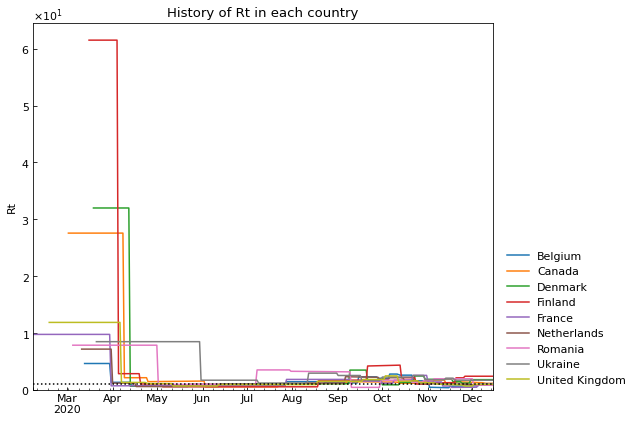

Country,Belgium,Canada,Denmark,Finland,France,Netherlands,Romania,Ukraine,United Kingdom
Date,,,,,,,,,
2020-12-11,1.06,1.12,1.77,2.37,1.02,0.85,0.77,1.67,0.95
2020-12-12,1.06,1.12,1.77,2.37,1.02,0.85,0.77,1.67,0.95
2020-12-13,1.06,1.12,1.77,2.37,1.02,0.85,0.77,1.67,0.95
2020-12-14,1.06,1.12,1.77,2.37,1.02,0.85,0.77,1.67,0.95
2020-12-15,1.06,1.12,1.77,2.37,1.02,0.85,0.77,1.67,0.95


In [14]:
analyser.history("Rt", roll_window=None).tail()

### $\rho$: Effective contact rate $\mathrm{[-]}$

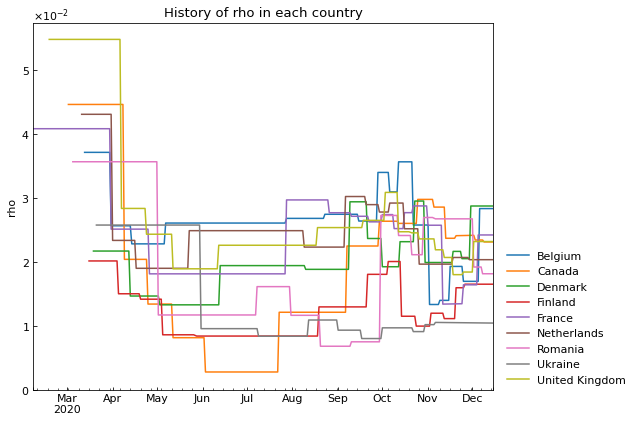

Country,Belgium,Canada,Denmark,Finland,France,Netherlands,Romania,Ukraine,United Kingdom
Date,,,,,,,,,
2020-12-11,0.028294,0.023084,0.028699,0.016484,0.024175,0.020313,0.018115,0.010411,0.023148
2020-12-12,0.028294,0.023084,0.028699,0.016484,0.024175,0.020313,0.018115,0.010411,0.023148
2020-12-13,0.028294,0.023084,0.028699,0.016484,0.024175,0.020313,0.018115,0.010411,0.023148
2020-12-14,0.028294,0.023084,0.028699,0.016484,0.024175,0.020313,0.018115,0.010411,0.023148
2020-12-15,0.028294,0.023084,0.028699,0.016484,0.024175,0.020313,0.018115,0.010411,0.023148


In [15]:
analyser.history("rho", roll_window=None).tail()

### $\sigma$: Recovery rate $\mathrm{[-]}$

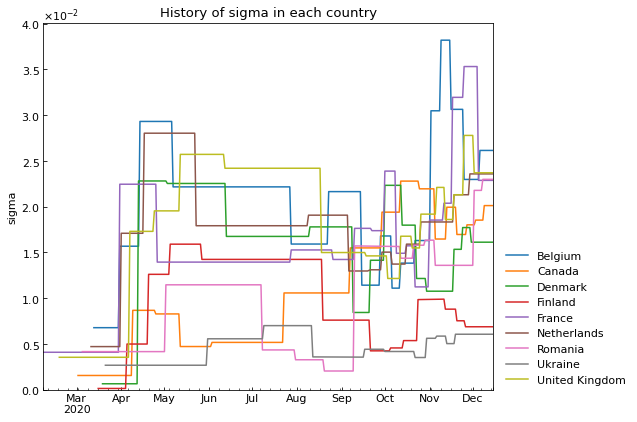

Country,Belgium,Canada,Denmark,Finland,France,Netherlands,Romania,Ukraine,United Kingdom
Date,,,,,,,,,
2020-12-11,0.026148,0.02012,0.016121,0.006878,0.022878,0.023583,0.022989,0.006062,0.023706
2020-12-12,0.026148,0.02012,0.016121,0.006878,0.022878,0.023583,0.022989,0.006062,0.023706
2020-12-13,0.026148,0.02012,0.016121,0.006878,0.022878,0.023583,0.022989,0.006062,0.023706
2020-12-14,0.026148,0.02012,0.016121,0.006878,0.022878,0.023583,0.022989,0.006062,0.023706
2020-12-15,0.026148,0.02012,0.016121,0.006878,0.022878,0.023583,0.022989,0.006062,0.023706


In [16]:
analyser.history("sigma", roll_window=None).tail()

### $\kappa$: Mortality rate of infected cases $\mathrm{[-]}$

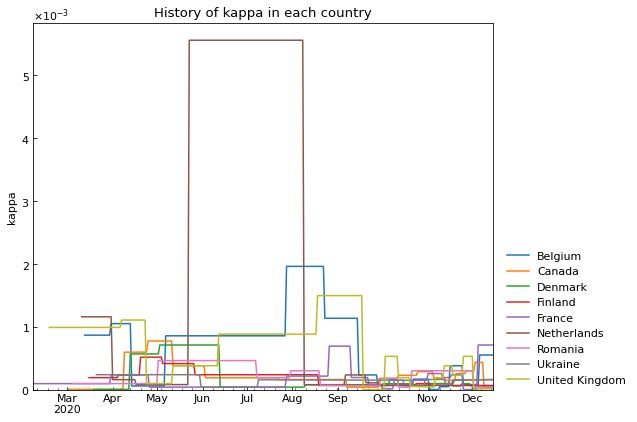

Country,Belgium,Canada,Denmark,Finland,France,Netherlands,Romania,Ukraine,United Kingdom
Date,,,,,,,,,
2020-12-11,0.000552,0.000041,0.000059,0.000067,0.000711,0.000162,0.00004,0.000159,0.000014
2020-12-12,0.000552,0.000041,0.000059,0.000067,0.000711,0.000162,0.00004,0.000159,0.000014
2020-12-13,0.000552,0.000041,0.000059,0.000067,0.000711,0.000162,0.00004,0.000159,0.000014
2020-12-14,0.000552,0.000041,0.000059,0.000067,0.000711,0.000162,0.00004,0.000159,0.000014
2020-12-15,0.000552,0.000041,0.000059,0.000067,0.000711,0.000162,0.00004,0.000159,0.000014


In [17]:
analyser.history("kappa", roll_window=None).tail()

### $\theta$: Mortality rate of S$^\ast$ cases $\mathrm{[-]}$

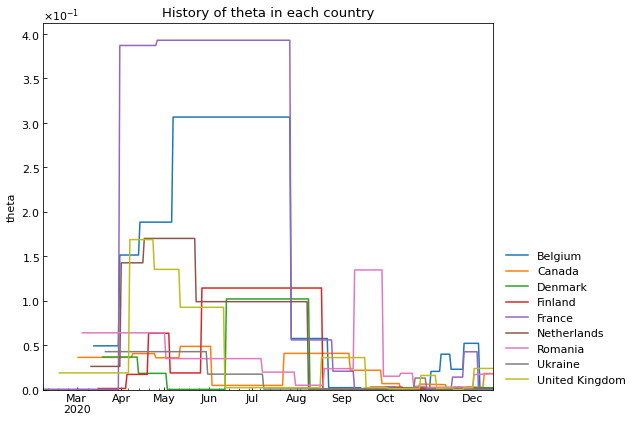

Country,Belgium,Canada,Denmark,Finland,France,Netherlands,Romania,Ukraine,United Kingdom
Date,,,,,,,,,
2020-12-11,0.000472,0.01823,0.002191,0.000662,0.000352,0.001139,0.017924,0.000355,0.023906
2020-12-12,0.000472,0.01823,0.002191,0.000662,0.000352,0.001139,0.017924,0.000355,0.023906
2020-12-13,0.000472,0.01823,0.002191,0.000662,0.000352,0.001139,0.017924,0.000355,0.023906
2020-12-14,0.000472,0.01823,0.002191,0.000662,0.000352,0.001139,0.017924,0.000355,0.023906
2020-12-15,0.000472,0.01823,0.002191,0.000662,0.000352,0.001139,0.017924,0.000355,0.023906


In [18]:
analyser.history("theta", roll_window=None).tail()

## (Experimental): Relationship of OxCGRT index and parameter values
Government responses will impact on parameter values of ODE models about 14 days later. Here, we will investigate on the relationship of [stringency index (from OxCGRT)](https://github.com/OxCGRT/covid-policy-tracker/blob/master/documentation/index_methodology.md) and reproduction number/model parameters.


In [19]:
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd

In [20]:
df = analyser.track()
param_cols = ["Rt", *cs.SIRF.PARAMETERS]
oxcgrt_cols = oxcgrt_data.OXCGRT_VARS[:]
cols = param_cols + oxcgrt_cols
delay = 14

for col in param_cols:
    df[col] = pd.to_numeric(df[col], errors="coerce")
    df[col] = df.groupby("Country")[col].shift(0 - delay)

df = df.dropna(how="any")
df = df.loc[:, ["Date", "Country", *cols]]
track_df = df.copy()
track_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25392 entries, 0 to 25503
Data columns (total 19 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   Date                                 25392 non-null  datetime64[ns]
 1   Country                              25392 non-null  object        
 2   Rt                                   25392 non-null  float64       
 3   theta                                25392 non-null  float64       
 4   kappa                                25392 non-null  float64       
 5   rho                                  25392 non-null  float64       
 6   sigma                                25392 non-null  float64       
 7   School_closing                       25392 non-null  int64         
 8   Workplace_closing                    25392 non-null  int64         
 9   Cancel_events                        25392 non-null  int64         
 10  Gatherings

In [21]:
# Correlation
df = track_df.copy()
df.corr().style.background_gradient(axis=None)

,Rt,theta,kappa,rho,sigma,School_closing,Workplace_closing,Cancel_events,Gatherings_restrictions,Transport_closing,Stay_home_restrictions,Internal_movement_restrictions,International_movement_restrictions,Information_campaigns,Testing_policy,Contact_tracing,Stringency_index
Rt,1.000000,-0.188888,-0.065996,0.674855,-0.608645,-0.230583,-0.419580,-0.332132,-0.497681,-0.313747,-0.305320,-0.319216,-0.297979,-0.370297,-0.264487,-0.322429,-0.375534
theta,-0.188888,1.000000,-0.034339,-0.200171,0.097603,0.178939,0.205330,0.286498,0.198818,0.205766,0.318578,0.335484,0.111653,0.108226,-0.272923,-0.035595,0.294121
kappa,-0.065996,-0.034339,1.000000,0.099123,0.052769,-0.088523,0.012443,0.165649,-0.141010,0.079212,-0.059491,-0.032561,-0.027133,0.068926,-0.063070,0.119263,-0.109573
rho,0.674855,-0.200171,0.099123,1.000000,-0.393456,-0.391369,-0.412174,-0.101516,-0.441659,-0.148460,-0.224910,-0.102893,-0.567109,-0.325896,-0.432256,-0.247356,-0.441134
sigma,-0.608645,0.097603,0.052769,-0.393456,1.000000,0.190667,0.359490,0.502050,0.522518,0.410447,0.383164,0.404099,0.105413,0.308816,0.115968,0.298262,0.377062
School_closing,-0.230583,0.178939,-0.088523,-0.391369,0.190667,1.000000,0.689231,0.101719,0.410978,0.084301,0.551249,0.165559,0.223195,0.355395,0.072337,-0.088214,0.755201
Workplace_closing,-0.419580,0.205330,0.012443,-0.412174,0.359490,0.689231,1.000000,0.443117,0.574414,0.277267,0.739829,0.332721,0.277167,0.448055,-0.036976,-0.137518,0.848214
Cancel_events,-0.332132,0.286498,0.165649,-0.101516,0.502050,0.101719,0.443117,1.000000,0.543917,0.658638,0.474548,0.726769,-0.062711,0.336332,-0.305788,-0.005697,0.518112
Gatherings_restrictions,-0.497681,0.198818,-0.141010,-0.441659,0.522518,0.410978,0.574414,0.543917,1.000000,0.526384,0.597434,0.648338,0.377207,0.552409,0.269578,0.248921,0.735857
Transport_closing,-0.313747,0.205766,0.079212,-0.148460,0.410447,0.084301,0.277267,0.658638,0.526384,1.000000,0.346664,0.696076,-0.034509,0.276180,-0.125112,0.097092,0.394204


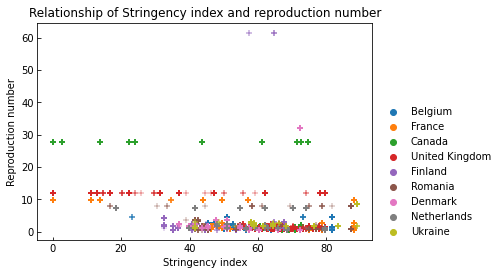

In [22]:
# Scatter plot of Stringency index and Rt
df = track_df.copy()
sns.scatterplot(data=df, x="Stringency_index", y="Rt", hue="Country", legend="brief", marker="+")
bbox_to_anchor=(1.02, 0)
bbox_loc="lower left"
plt.legend(bbox_to_anchor=bbox_to_anchor, loc=bbox_loc, borderaxespad=0)
plt.title("Relationship of Stringency index and reproduction number")
plt.ylabel("Reproduction number")
plt.xlabel("Stringency index")
plt.show()